# Mobile Device Usage and User Behavior Dataset
# Analyzing Mobile Usage Patterns and User Behavior Classification Across Devices

About Dataset
<br>
This dataset provides a comprehensive analysis of mobile device usage patterns and user behavior classification. It contains 700 samples of user data, including metrics 
<br>
such as app usage time, screen-on time, battery drain, and data consumption. Each entry is categorized into one of five user behavior classes, ranging from light to extreme
<br>
 usage, allowing for insightful analysis and modeling.


<ul>
  <li><strong>Key Features:</strong>
  <li><strong>User ID:</strong> Unique identifier for each user.</li>
  <li><strong>Device Model:</strong> Model of the user's smartphone.</li>
  <li><strong>Operating System:</strong> The OS of the device (iOS or Android).</li>
  <li><strong>App Usage Time:</strong> Daily time spent on mobile applications, measured in minutes.</li>
  <li><strong>Screen On Time:</strong> Average hours per day the screen is active.</li>
  <li><strong>Battery Drain:</strong> Daily battery consumption in mAh.</li>
  <li><strong>Number of Apps Installed:</strong> Total apps available on the device.</li>
  <li><strong>Data Usage:</strong> Daily mobile data consumption in megabytes.</li>
  <li><strong>Age:</strong> Age of the user.</li>
  <li><strong>Gender:</strong> Gender of the user (Male or Female).</li>
  <li><strong>User Behavior Class:</strong> Classification of user behavior based on usage patterns (1 to 5).</li>
</ul>
<p>This dataset is ideal for researchers, data scientists, and analysts interested in understanding mobile user behavior and developing predictive models in the realm of mobile technology and applications.</p>


In [172]:
# Import basic libraries
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings 
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



# Import classification algorithms from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier  # Requires xgboost library


In [173]:
# Read the CSV file into a DataFrame
userBehavior_MobileDevice= pd.read_csv('user_behavior_dataset.csv')

# Display the first few rows of the DataFrame
userBehavior_MobileDevice.sample(5)


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
41,42,OnePlus 9,Android,576,10.1,2447,83,2323,33,Male,5
446,447,OnePlus 9,Android,546,8.8,2852,81,1641,24,Male,5
186,187,iPhone 12,iOS,402,7.8,2014,79,1088,34,Female,4
90,91,Google Pixel 5,Android,116,2.1,912,39,307,40,Female,2
461,462,Samsung Galaxy S21,Android,123,3.3,938,36,438,55,Male,2


In [174]:

# Generate the profile report
profile = ProfileReport(userBehavior_MobileDevice, title='Pandas Profiling Report', explorative=True)

# Save the report to an HTML file
profile.to_file('your_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [175]:
userBehavior_MobileDevice.shape

(700, 11)

In [176]:
userBehavior_MobileDevice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [177]:
# Find total null values in each column
null_values = userBehavior_MobileDevice.isnull().sum()

# Print the total count of null values for each column
print("Null values in each column:\n", null_values)

Null values in each column:
 User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


In [178]:
duplicates = userBehavior_MobileDevice.duplicated()

# Count total duplicates
total_duplicates = duplicates.sum()

# Print total duplicate rows
print(f"Total duplicate rows: {total_duplicates}")

Total duplicate rows: 0


In [179]:
userBehavior_MobileDevice = userBehavior_MobileDevice.drop(columns=['User ID'],axis = 1)
userBehavior_MobileDevice.head()



,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [180]:
userBehavior_MobileDevice.describe()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [181]:
userBehavior_MobileDevice.describe().corr()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
App Usage Time (min/day),1.000000,0.660260,0.531521,0.737152,0.658818,0.692912,0.653831
Screen On Time (hours/day),0.660260,1.000000,-0.276994,0.994060,-0.110731,0.998591,0.999962
Battery Drain (mAh/day),0.531521,-0.276994,1.000000,-0.170838,0.956130,-0.230863,-0.285035
Number of Apps Installed,0.737152,0.994060,-0.170838,1.000000,-0.005814,0.997890,0.993117
Data Usage (MB/day),0.658818,-0.110731,0.956130,-0.005814,1.000000,-0.068156,-0.119422
Age,0.692912,0.998591,-0.230863,0.997890,-0.068156,1.000000,0.998194
User Behavior Class,0.653831,0.999962,-0.285035,0.993117,-0.119422,0.998194,1.000000


In [182]:
v = userBehavior_MobileDevice.describe().corr()


In [183]:
userBehavior_MobileDevice.shape

(700, 10)

In [184]:
# Assuming 'data' is your DataFrame
categorical_columns = userBehavior_MobileDevice.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns 

['Device Model', 'Operating System', 'Gender']

In [185]:
numeric_columns = userBehavior_MobileDevice.select_dtypes(include=['number']).columns
numeric_columns

Index(['App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'User Behavior Class'],
      dtype='object')

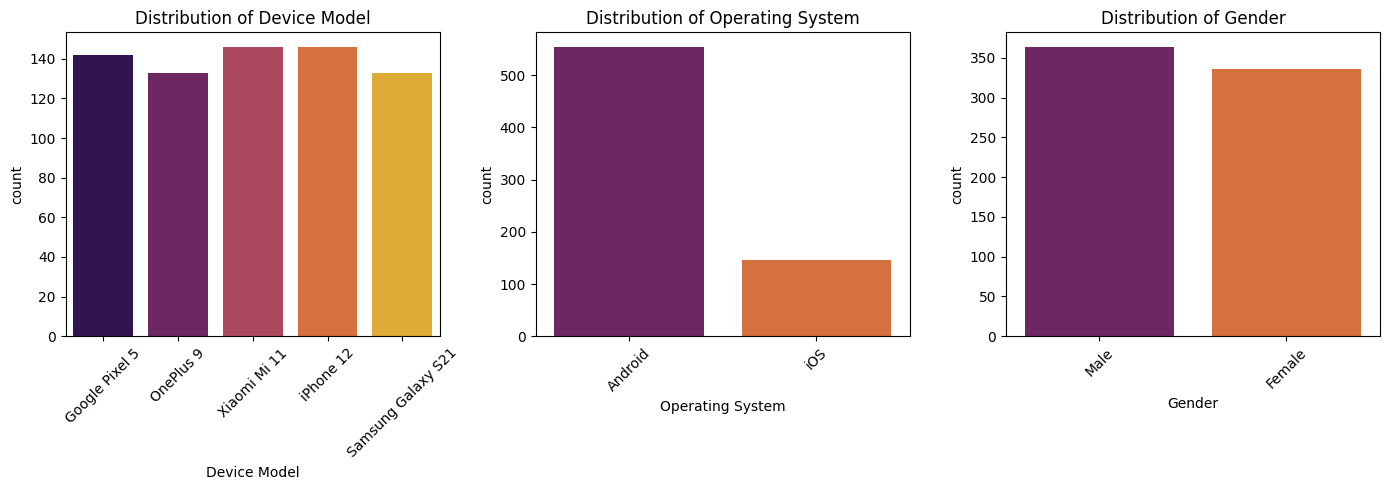

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features for count plots
categorical_columns = ['Device Model', 'Operating System', 'Gender']

# Number of columns for subplots
num_columns = len(categorical_columns)

# Determine layout for subplots
cols = 3  # Number of columns in the plot grid
rows = (num_columns // cols) + (num_columns % cols > 0)  # Calculate number of rows

# Set up the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, 5))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Create count plots for each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(data=userBehavior_MobileDevice, x=column, palette='inferno', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


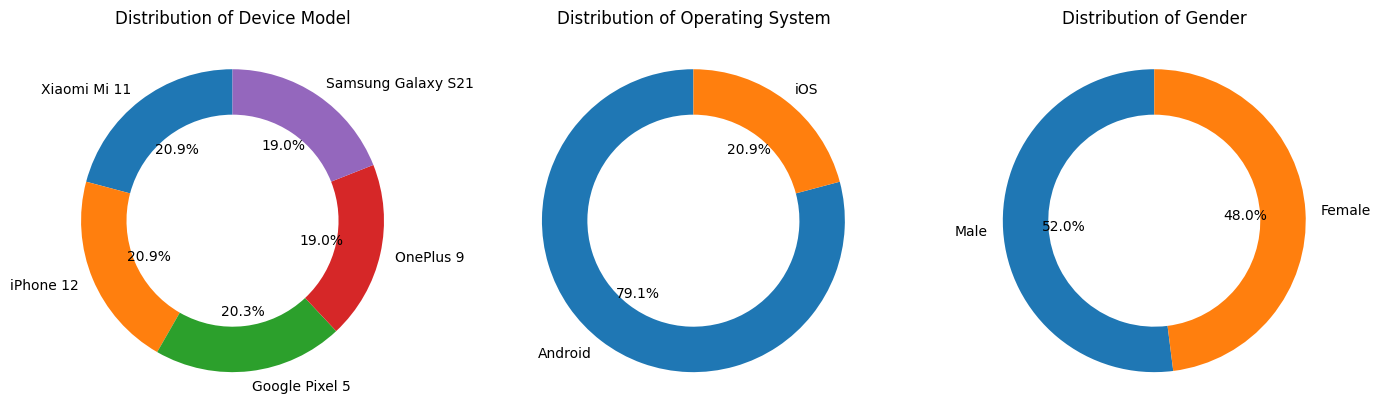

In [187]:
# Define the features for count plots
categorical_columns = ['Device Model', 'Operating System', 'Gender']

# numeric_columns(len(categorical_columns))
# Determine layout for subplots
cols = 3 # Number of columns in the plot grid
rows = (num_columns // cols) + (num_columns % cols > 0)  # Calculate number of rows

# Set up the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, 8))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Create pie plots for each categorical column
for i, column in enumerate(categorical_columns):
    # Count the values in the categorical column
    value_counts = userBehavior_MobileDevice[column].value_counts()
    
    # Create the pie plot
    axes[i].pie(value_counts, autopct='%1.1f%%', startangle=90, 
                 labels=value_counts.index, wedgeprops=dict(width=0.3))
    
    # Set the title for the subplot
    axes[i].set_title(f'Distribution of {column}')
# #Remove empty subplots
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()    
# 

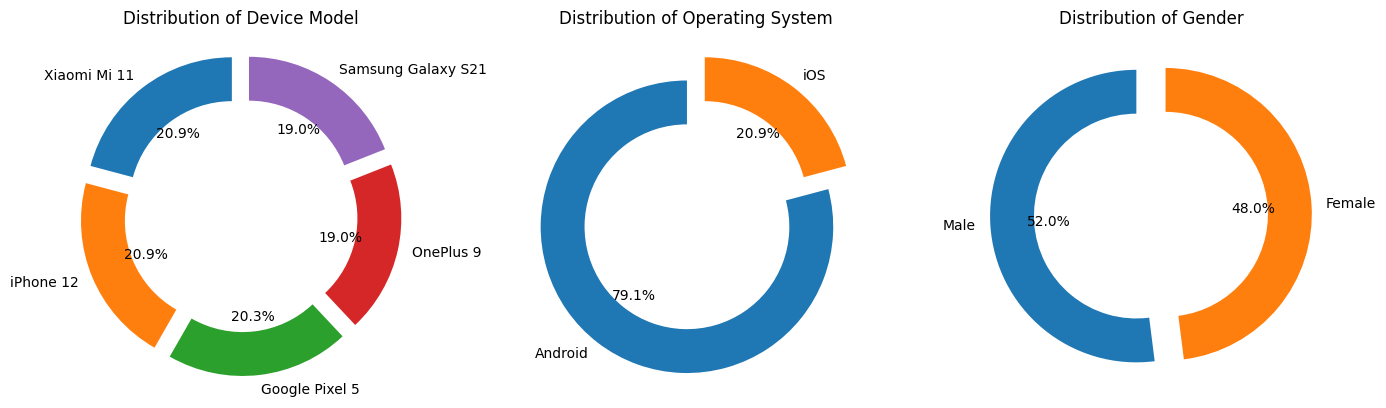

In [188]:
# Define the features for pie plots
categorical_columns = ['Device Model', 'Operating System', 'Gender']

# Determine the number of categorical columns
num_columns = len(categorical_columns)

# Determine layout for subplots
cols = 3  # Number of columns in the plot grid
rows = (num_columns // cols) + (num_columns % cols > 0)  # Calculate number of rows

# Set up the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, 8))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Create pie plots for each categorical column
for i, column in enumerate(categorical_columns):
    # Count the values in the categorical column
    value_counts = userBehavior_MobileDevice[column].value_counts()
    
    # Create the pie plot with customization
    axes[i].pie(
        value_counts,
        autopct='%1.1f%%',         # Display percentage
        startangle=90,             # Start angle
        labels=value_counts.index,  # Labels for the slices
        wedgeprops=dict(width=0.3), # Width of the wedges
        colors=plt.cm.tab10.colors, # Color palette
        explode=[0.1] * len(value_counts)  # Explode all slices for emphasis
    )
    
    # Set the title for the subplot
    axes[i].set_title(f'Distribution of {column}')

# Remove empty subplots if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [189]:
userBehavior_MobileDevice.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [190]:
userBehavior_MobileDevice['App Usage Time (min/day)']

0      393
1      268
2      154
3      239
4      187
      ... 
695     92
696    316
697     99
698     62
699    212
Name: App Usage Time (min/day), Length: 700, dtype: int64

In [191]:
userBehavior_MobileDevice.groupby('App Usage Time (min/day)')['Battery Drain (mAh/day)'].describe()


,count,mean,std,min,25%,50%,75%,max
App Usage Time (min/day),,,,,,,,
30,3.0,538.000000,51.507281,479.0,520.00,561.0,567.50,574.0
31,1.0,585.000000,NaN,585.0,585.00,585.0,585.00,585.0
32,3.0,488.333333,83.691895,416.0,442.50,469.0,524.50,580.0
33,2.0,326.000000,11.313708,318.0,322.00,326.0,330.00,334.0
34,3.0,473.666667,113.209246,345.0,431.50,518.0,538.00,558.0
...,...,...,...,...,...,...,...,...
593,2.0,2585.500000,122.329473,2499.0,2542.25,2585.5,2628.75,2672.0
594,1.0,2839.000000,NaN,2839.0,2839.00,2839.0,2839.00,2839.0
595,1.0,2968.000000,NaN,2968.0,2968.00,2968.0,2968.00,2968.0


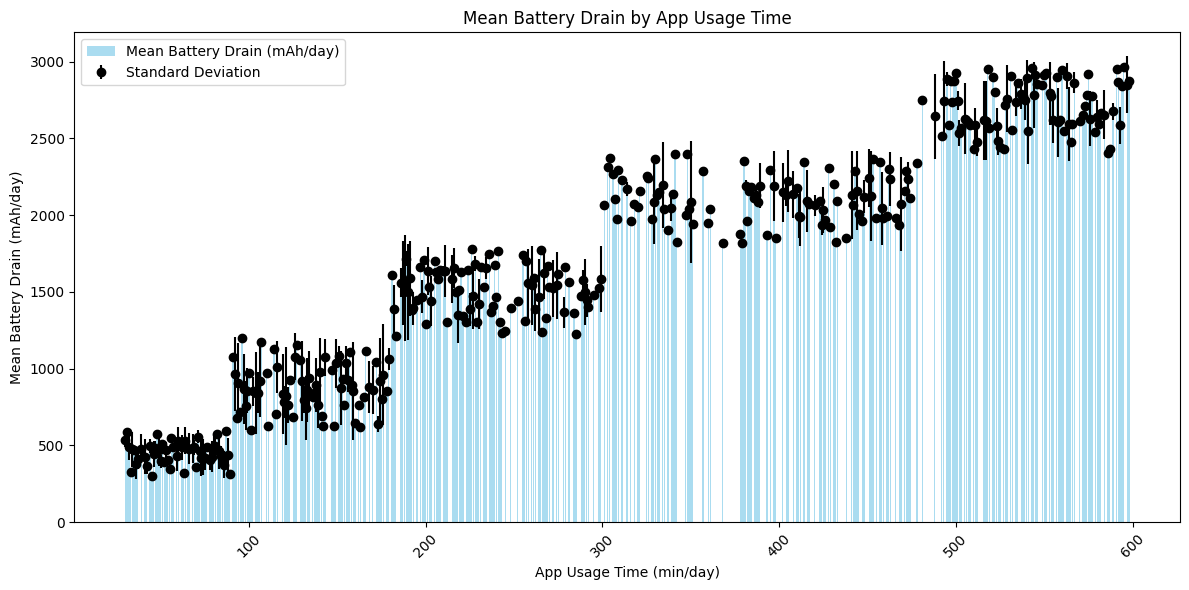

In [192]:
# Group by 'App Usage Time (min/day)' and calculate descriptive statistics for 'Battery Drain (mAh/day)'
grouped_stats = userBehavior_MobileDevice.groupby('App Usage Time (min/day)')['Battery Drain (mAh/day)'].describe()

# Reset the index to make it easier to plot
grouped_stats = grouped_stats.reset_index()

# Plotting the bar plot for the descriptive statistics
plt.figure(figsize=(12, 6))

# Plot the mean battery drain as an example
plt.bar(grouped_stats['App Usage Time (min/day)'], grouped_stats['mean'], color='skyblue', label='Mean Battery Drain (mAh/day)', alpha=0.7)

# Optionally, you can add other statistics, such as std, min, or max in separate bars or annotations
plt.errorbar(grouped_stats['App Usage Time (min/day)'], grouped_stats['mean'], yerr=grouped_stats['std'], fmt='o', color='black', label='Standard Deviation')

# Adding labels and title
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Mean Battery Drain (mAh/day)')
plt.title('Mean Battery Drain by App Usage Time')
plt.xticks(rotation=45)
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [193]:
userBehavior_MobileDevice.head(2)

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3


In [194]:
userBehavior_MobileDevice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device Model                700 non-null    object 
 1   Operating System            700 non-null    object 
 2   App Usage Time (min/day)    700 non-null    int64  
 3   Screen On Time (hours/day)  700 non-null    float64
 4   Battery Drain (mAh/day)     700 non-null    int64  
 5   Number of Apps Installed    700 non-null    int64  
 6   Data Usage (MB/day)         700 non-null    int64  
 7   Age                         700 non-null    int64  
 8   Gender                      700 non-null    object 
 9   User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 54.8+ KB


In [195]:
# Identify numeric columns
numeric_columns = userBehavior_MobileDevice.select_dtypes(include=['number']).columns.tolist()

# Display the numeric columns
print("Numeric columns in the DataFrame:")
print(numeric_columns)


Numeric columns in the DataFrame:
['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'User Behavior Class']


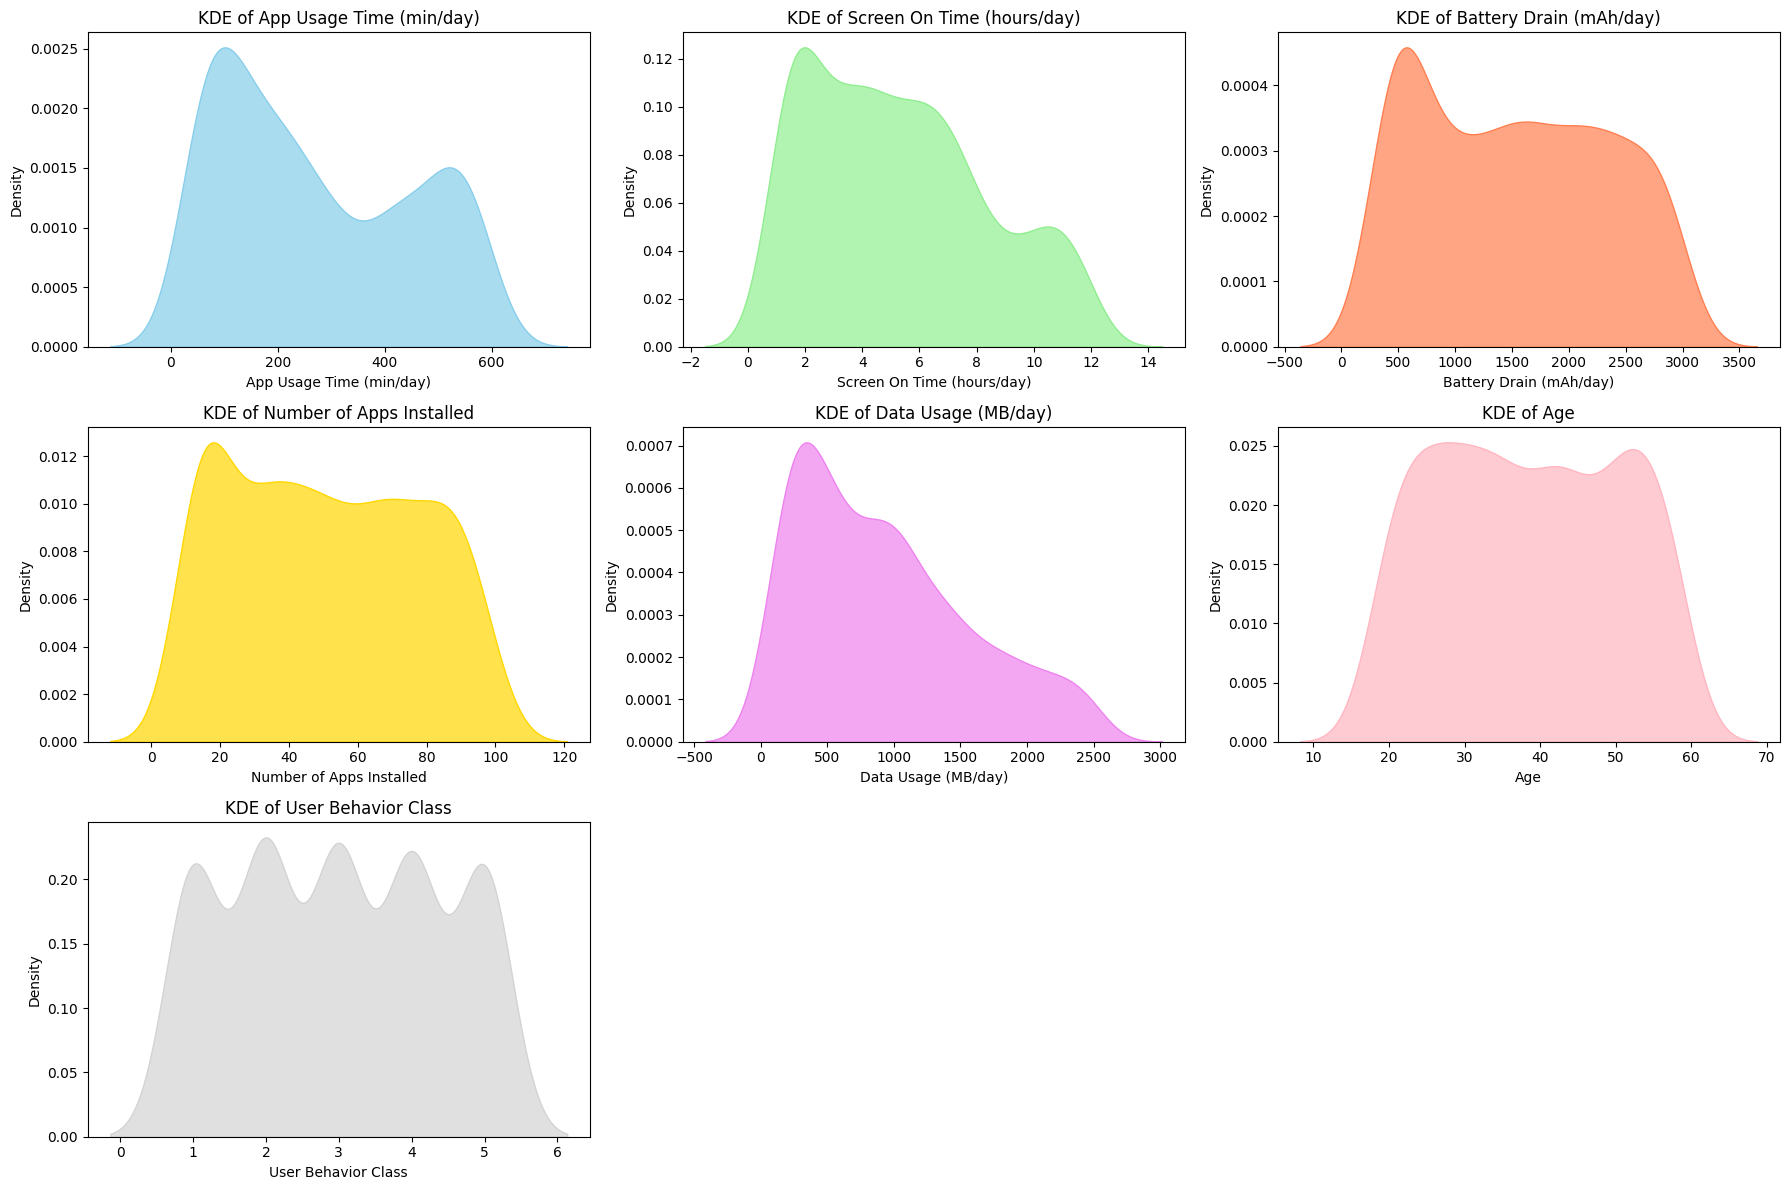

In [196]:
# Numeric columns identified
numeric_columns = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
                   'Battery Drain (mAh/day)', 'Number of Apps Installed', 
                   'Data Usage (MB/day)', 'Age', 'User Behavior Class']

# Define a list of colors for the plots
colors = ['skyblue', 'lightgreen', 'coral', 'gold', 'violet', 'lightpink', 'lightgray']

# Determine layout for subplots
cols = 3  # Number of columns in the plot grid
rows = (len(numeric_columns) // cols) + (len(numeric_columns) % cols > 0)  # Calculate number of rows

# Set up the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 12))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Create KDE plots for each numeric column
for i, column in enumerate(numeric_columns):
    sns.kdeplot(userBehavior_MobileDevice[column], ax=axes[i], fill=True, 
                 color=colors[i % len(colors)], alpha=0.7)
    
    # Set the title and labels for each subplot
    axes[i].set_title(f'KDE of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Remove empty subplots if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


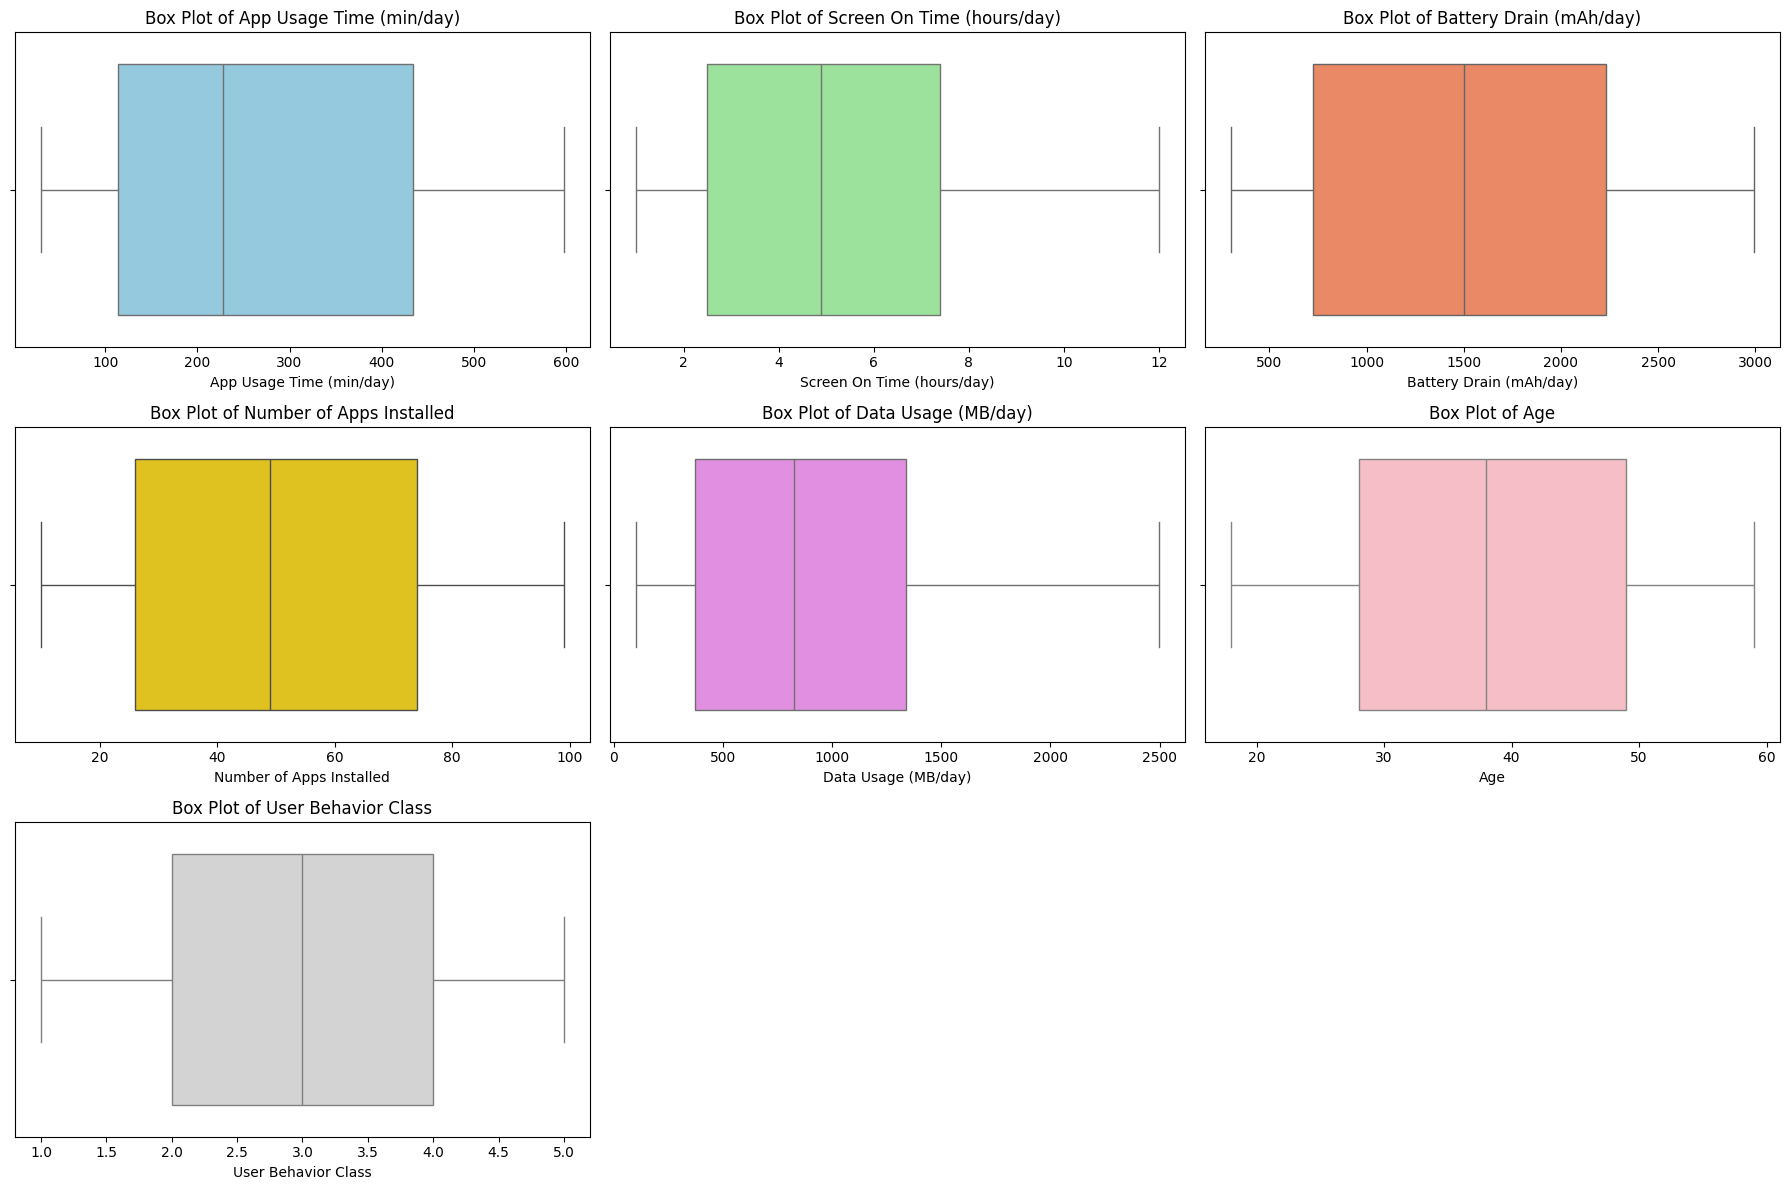

In [197]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame for demonstration (replace this with your actual DataFrame)
# userBehavior_MobileDevice = pd.read_csv('path_to_your_data.csv')  # Load your dataset

# Numeric columns identified
numeric_columns = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
                   'Battery Drain (mAh/day)', 'Number of Apps Installed', 
                   'Data Usage (MB/day)', 'Age', 'User Behavior Class']

# Define a list of colors for the plots (optional, boxplots can also use palettes)
colors = ['skyblue', 'lightgreen', 'coral', 'gold', 'violet', 'lightpink', 'lightgray']

# Determine layout for subplots
cols = 3  # Number of columns in the plot grid
rows = (len(numeric_columns) // cols) + (len(numeric_columns) % cols > 0)  # Calculate number of rows

# Set up the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 12))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Create box plots for each numeric column
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=userBehavior_MobileDevice[column], ax=axes[i], color=colors[i % len(colors)])
    
    # Set the title and labels for each subplot
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)

# Remove empty subplots if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()



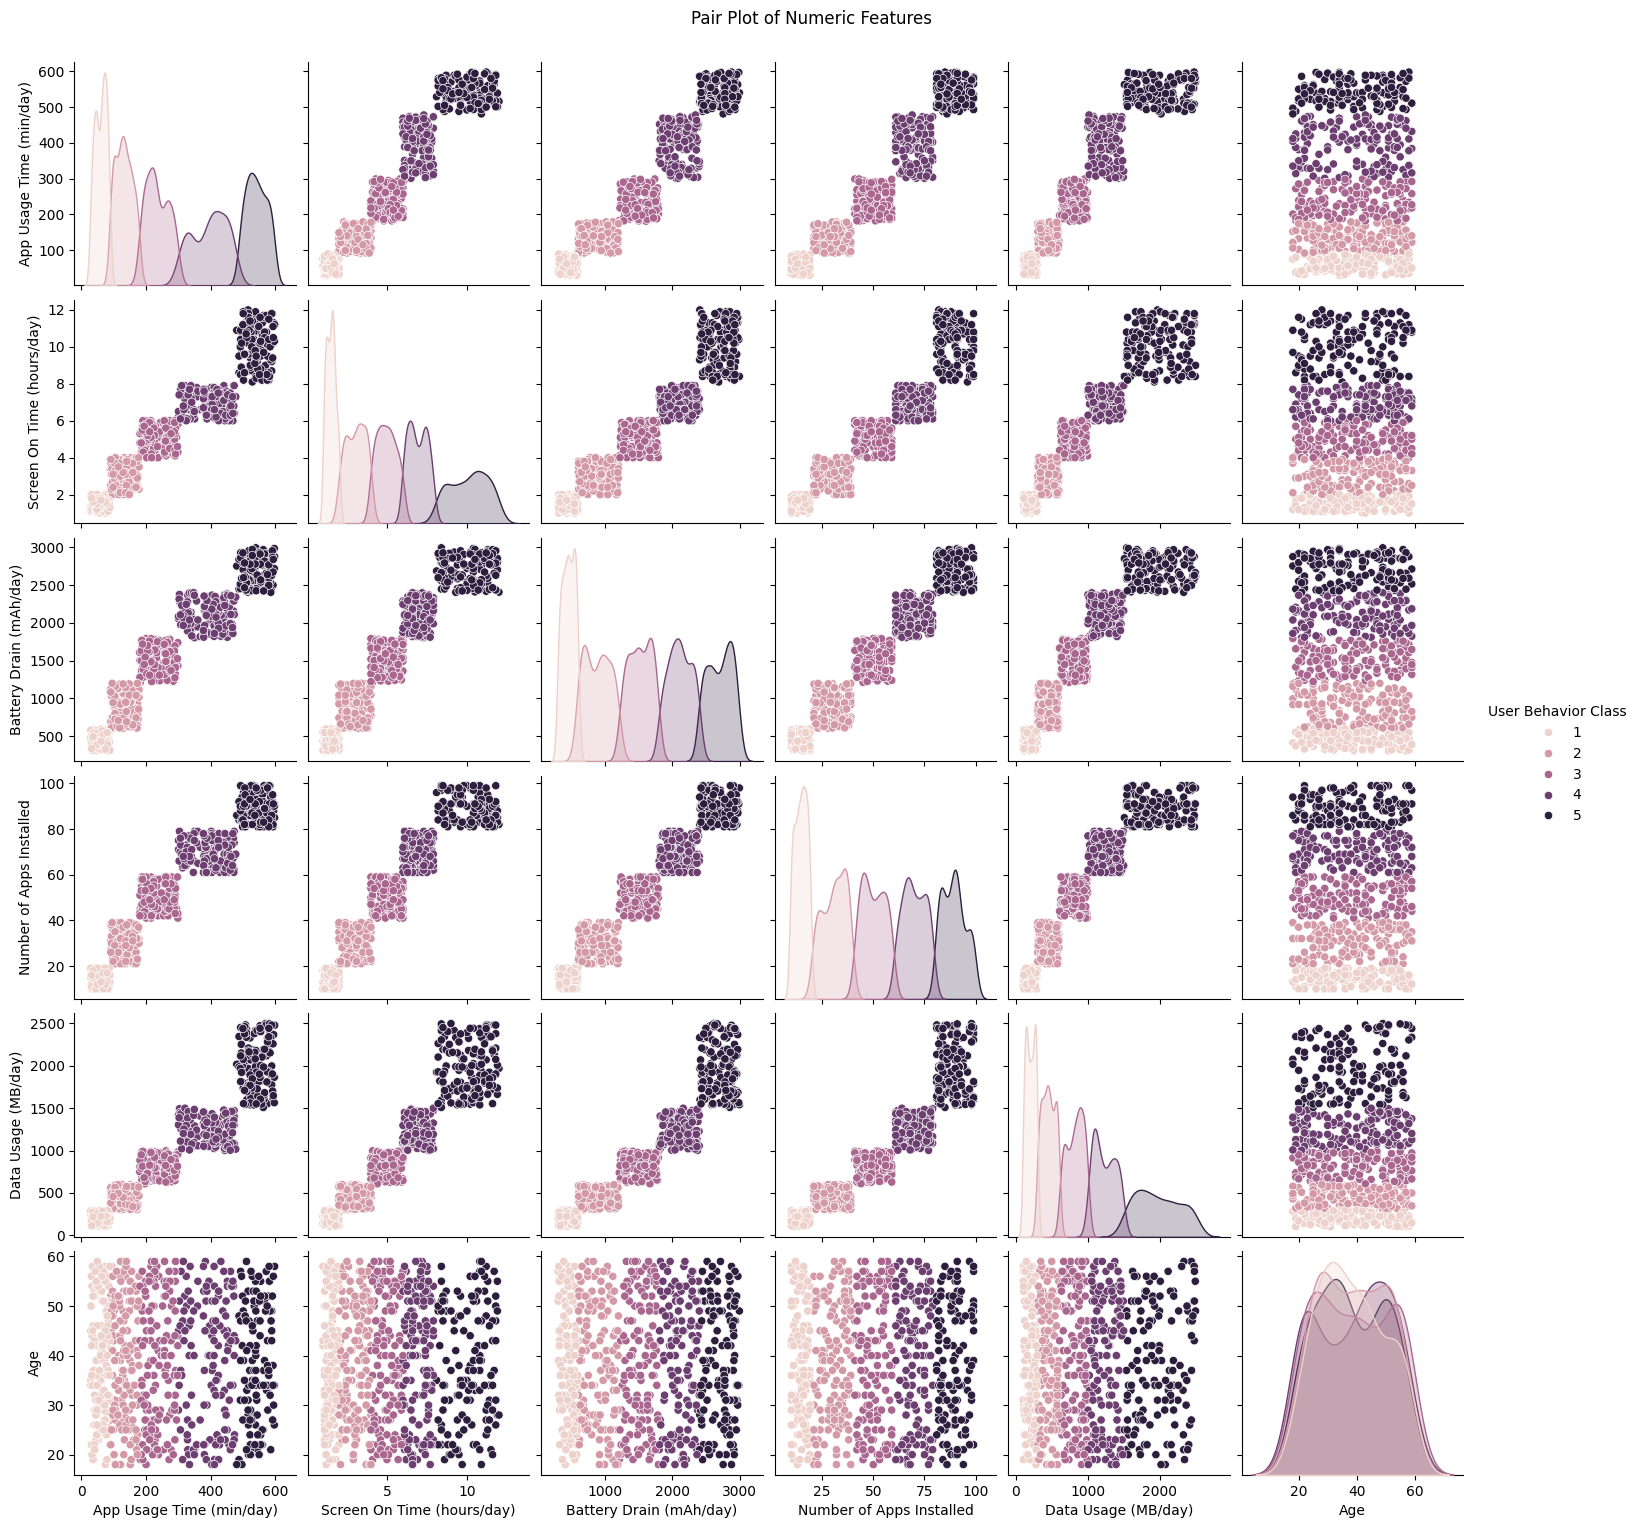

In [198]:
# Create a pair plot
sns.pairplot(userBehavior_MobileDevice,hue = 'User Behavior Class')

# Adjust the title (optional)
plt.suptitle('Pair Plot of Numeric Features', y=1.02)  # y parameter adjusts the title position

# Show the plot
plt.show()

In [199]:
corr = userBehavior_MobileDevice.describe().corr()


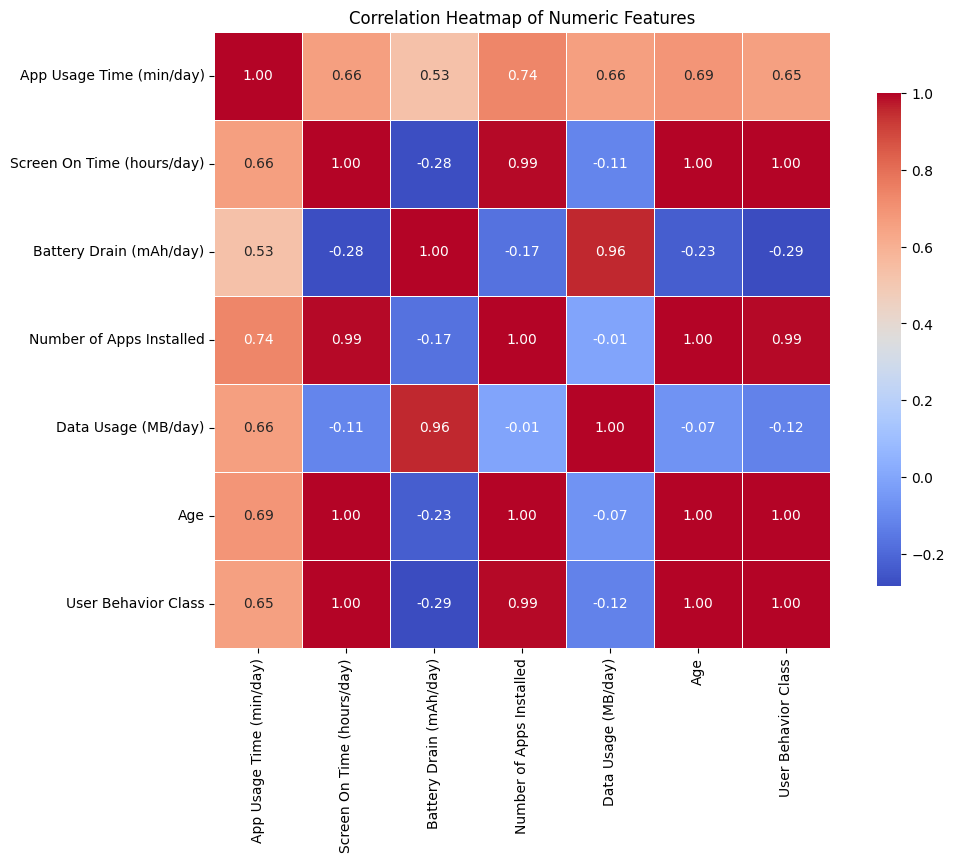

In [200]:
# Calculate the correlation matrix
corr = userBehavior_MobileDevice.describe().corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, 
            linewidths=0.5, cbar_kws={"shrink": .8})

# Set the title
plt.title('Correlation Heatmap of Numeric Features')

# Show the plot
plt.show()

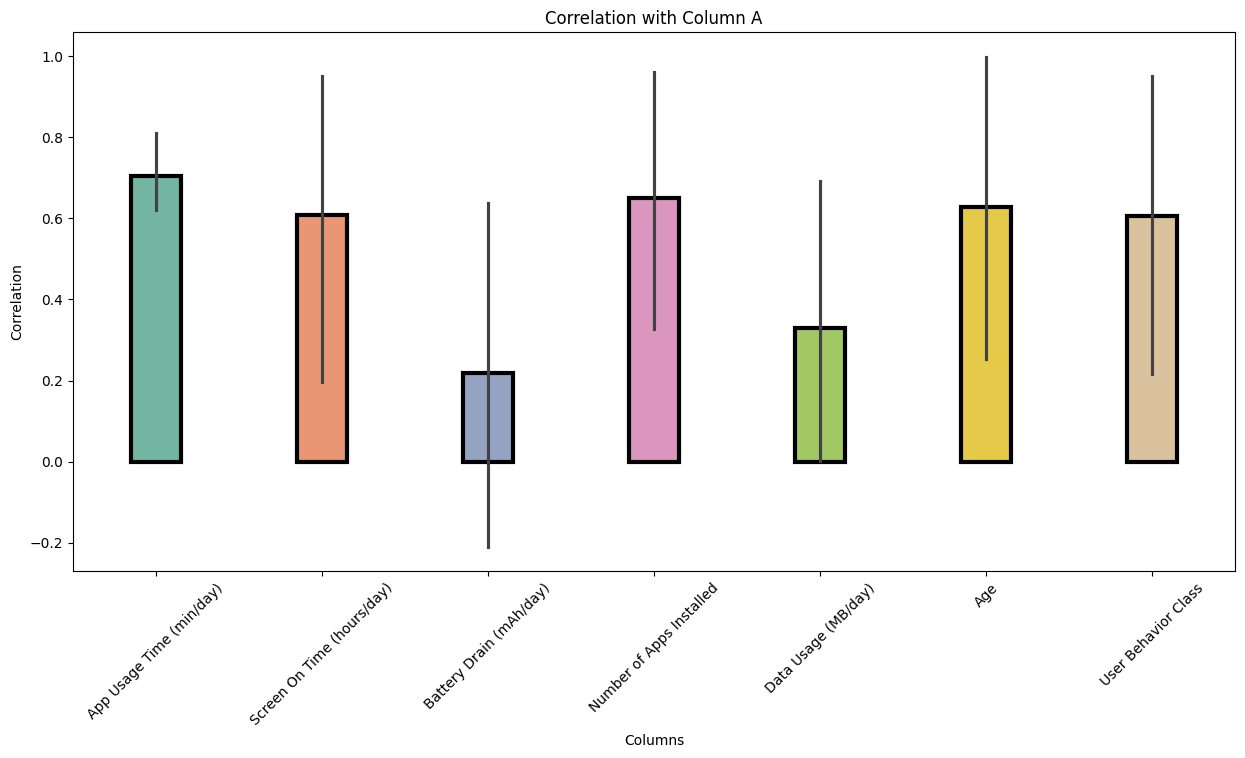

In [201]:
plt.figure(figsize=(15, 7))
# sns.barplot(x=correlation_matrix.columns, y=correlation_matrix.iloc[0], palette='viridis')
sns.barplot(corr,palette='Set2',edgecolor='black', linewidth=3,width=0.3,orient='v',)
plt.title('Correlation with Column A')
plt.xlabel('Columns')
plt.ylabel('Correlation') 

# Set the angle of the x-axis labels
plt.xticks(rotation=45)     
plt.show()

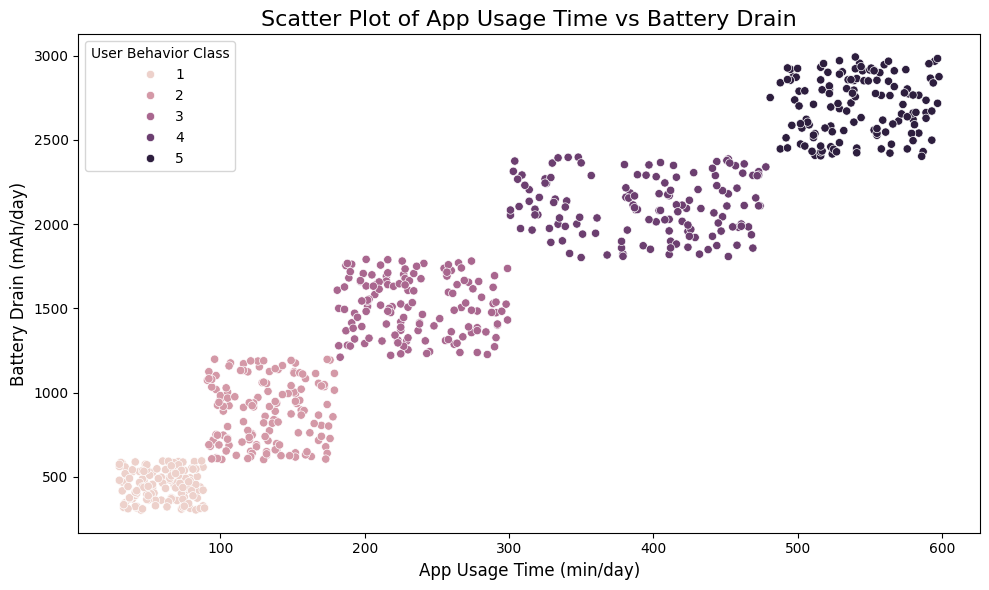

In [202]:
# Create a scatter plot with Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=userBehavior_MobileDevice, 
                 x='App Usage Time (min/day)', 
                 y='Battery Drain (mAh/day)', 
                 hue='User Behavior Class',  # Color by this categorical variable
                 alpha=1)  # You can adjust alpha for transparency

# Set titles and labels
plt.title('Scatter Plot of App Usage Time vs Battery Drain', fontsize=16)
plt.xlabel('App Usage Time (min/day)', fontsize=12)
plt.ylabel('Battery Drain (mAh/day)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [203]:
userBehavior_MobileDevice.head(2)

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3


In [204]:

# Drop column 'B'
x = userBehavior_MobileDevice.drop('User Behavior Class', axis=1)
y = userBehavior_MobileDevice['User Behavior Class'] 

In [205]:
x.shape

(700, 9)

In [206]:
y.shape

(700,)

In [207]:
y

0      4
1      3
2      2
3      3
4      3
      ..
695    2
696    4
697    2
698    1
699    3
Name: User Behavior Class, Length: 700, dtype: int64

In [208]:
# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [209]:
# Separate numerical and categorical columns
numerical_features = x.select_dtypes(include=['int64','float64']).columns
categorical_features = x.select_dtypes(include=['object']).columns

In [210]:
print(categorical_features)

Index(['Device Model', 'Operating System', 'Gender'], dtype='object')


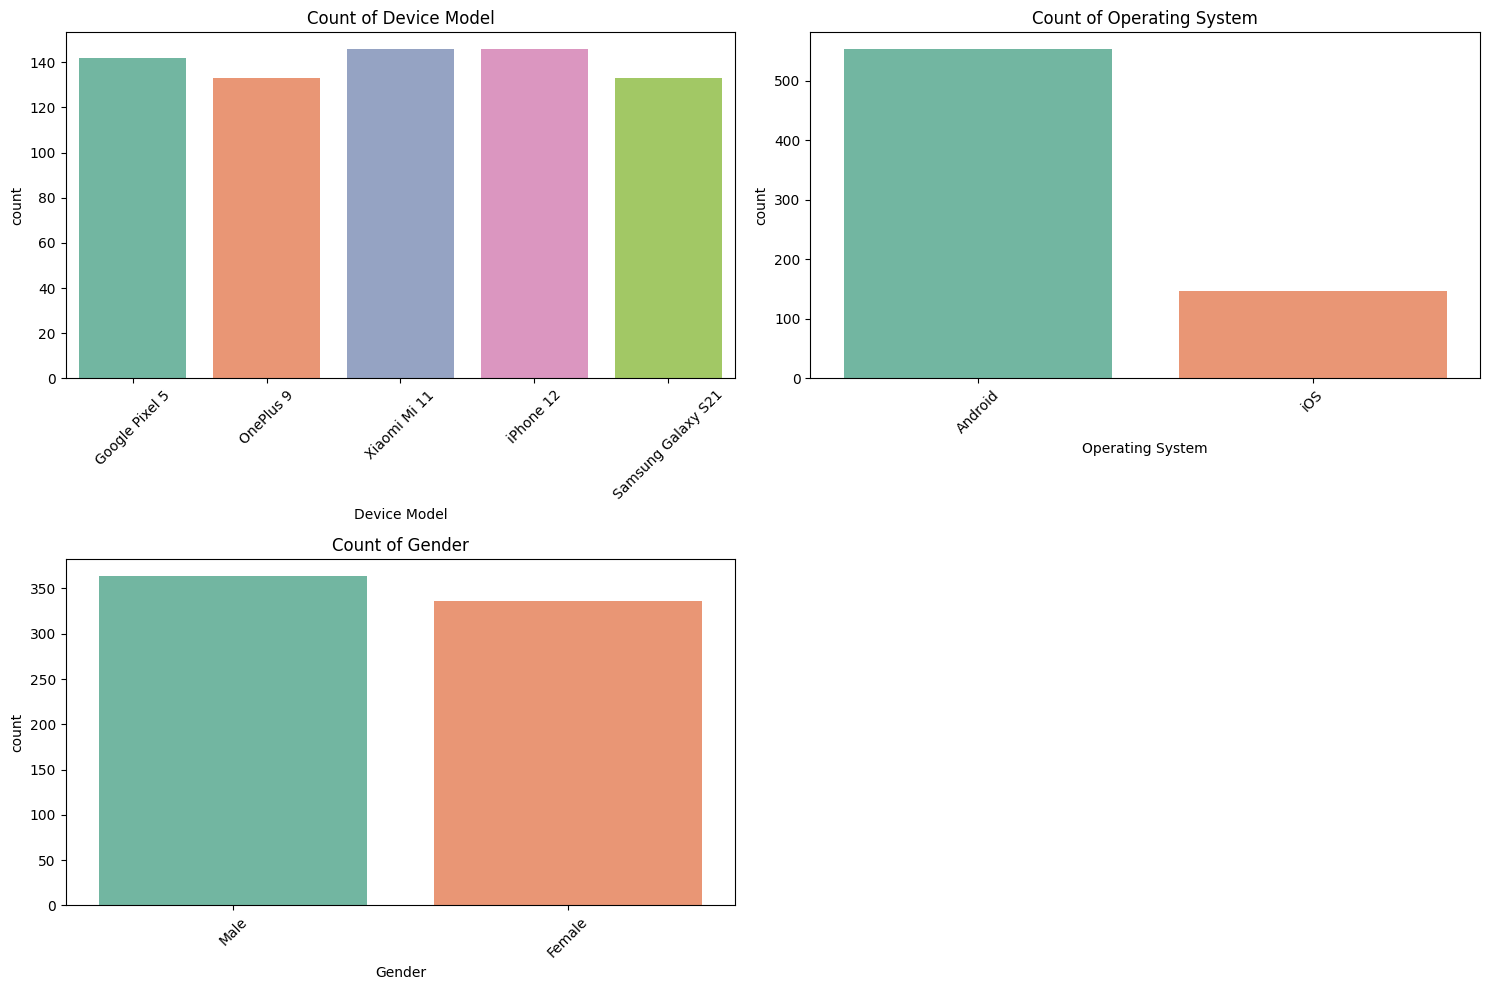

In [211]:

columns = ['Device Model', 'Operating System', 'Gender']

# Set the size of the figure
plt.figure(figsize=(15, 10))

# Loop through each column and create a bar plot
for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # Adjust the grid as necessary (2 rows, 2 columns)
    sns.countplot(data=userBehavior_MobileDevice, x=column,palette = 'Set2')
    plt.title(f'Count of {column}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()


In [212]:
# Preprocessing for numerical data (Standard scaling) and categorical data (One-Hot Encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output = False,drop='first',handle_unknown='ignore'),categorical_features)
    ])

In [213]:
# Fit and transform for classification
x_class_train = preprocessor.fit_transform(x_train)
x_class_test = preprocessor.transform(x_test)

In [214]:
x_class_test

array([[ 0.1699345 ,  0.38879765,  1.01947237, ...,  0.        ,
         0.        ,  1.        ],
       [-1.15401886, -1.29774899, -1.40944488, ...,  0.        ,
         0.        ,  1.        ],
       [-1.08726491, -1.36261617, -1.3271087 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.74236949, -0.48690926, -0.4795304 , ...,  1.        ,
         1.        ,  1.        ],
       [-1.30421525, -1.16801463, -1.21450187, ...,  0.        ,
         0.        ,  0.        ],
       [-0.99269681, -0.48690926, -0.98686655, ...,  0.        ,
         0.        ,  0.        ]])

In [215]:
x_class_train

array([[ 0.31456806,  0.61583278,  1.00494246, ...,  0.        ,
         0.        ,  0.        ],
       [-0.15827243,  0.19419612, -0.35118283, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.88753947,  0.48609842,  0.6780194 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.84859966,  0.38879765,  0.52787696, ...,  0.        ,
         0.        ,  0.        ],
       [-0.93706852, -0.61664362, -0.89000046, ...,  0.        ,
         0.        ,  0.        ],
       [-0.5532333 , -0.90854592, -0.73138224, ...,  0.        ,
         0.        ,  0.        ]])

In [216]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age'],
      dtype='object')),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['Device Model', 'Operating System', 'Gender'], dtype='object'))])

In [217]:
# List of classifiers to evaluate
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP': MLPClassifier(max_iter=500)
    # 'XGBoost': XGBClassifier()  # Adjust for warning
}



 This score represents the average accuracy of your model across 5 different training and validation splits.
 <br>
 An accuracy of 1.00 or 100% for many models means that they are predicting correctly across all splits.
 <br>
 <br>

 Test Set Accuracy: After training on the full training set, you're getting 1.00 or 100% accuracy on your test data.
 <br>
  This means the model is perfectly classifying the unseen test data.

In [219]:
# Train each classifier and print the accuracy
for name, clf in classifiers.items():
    # Create a pipeline with preprocessing and the classifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])


    # Perform cross-validation and get the accuracy score for each fold
    cv_scores = cross_val_score(pipeline, x_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    
    # Calculate the mean accuracy across all folds
    mean_cv_accuracy = cv_scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(x_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(x_test)
    
    # Calculate metrics
       # Print the cross-validation results and test set metrics
    print(f"Classifier: {name}")
    print(f"Cross-validated Accuracy (mean of 5-fold): {mean_cv_accuracy:.2f}")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("_____________________________________________________________________________")
  

Classifier: Logistic Regression
Cross-validated Accuracy (mean of 5-fold): 1.00
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
_____________________________________________________________________________
Classifier: KNN
Cross-validated Accuracy (mean of 5-fold): 0.99
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
_____________________________________________________________________________
Classifier: SVC
Cross-validated Accuracy (mean of 5-fold): 1.00
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
_____________________________________________________________________________
Classifier: Decision Tree
Cross-validated Accuracy (mean of 5-fold): 1.00
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
_____________________________________________________________________________
Classifier: Random Forest
Cross-validated Accuracy (mean of 5-fold): 1.00
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
_____________________________________

In [220]:
print(np.unique(y_train))

[1 2 3 4 5]


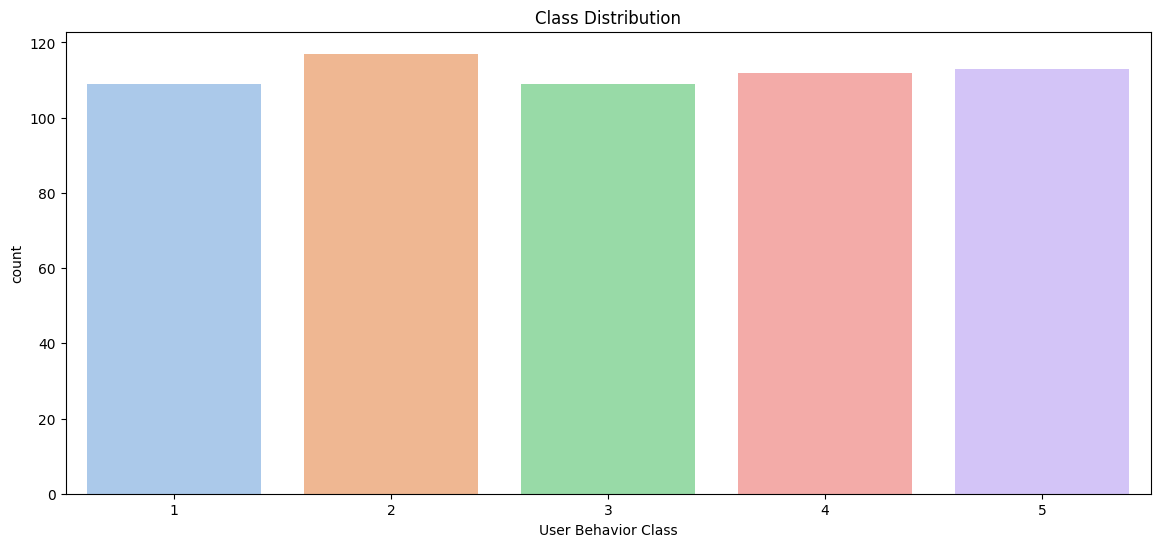

In [221]:
plt.figure(figsize=(14,6))
# Using a built-in palette
sns.countplot(x=y_train, palette='pastel')
plt.title('Class Distribution')
plt.show()


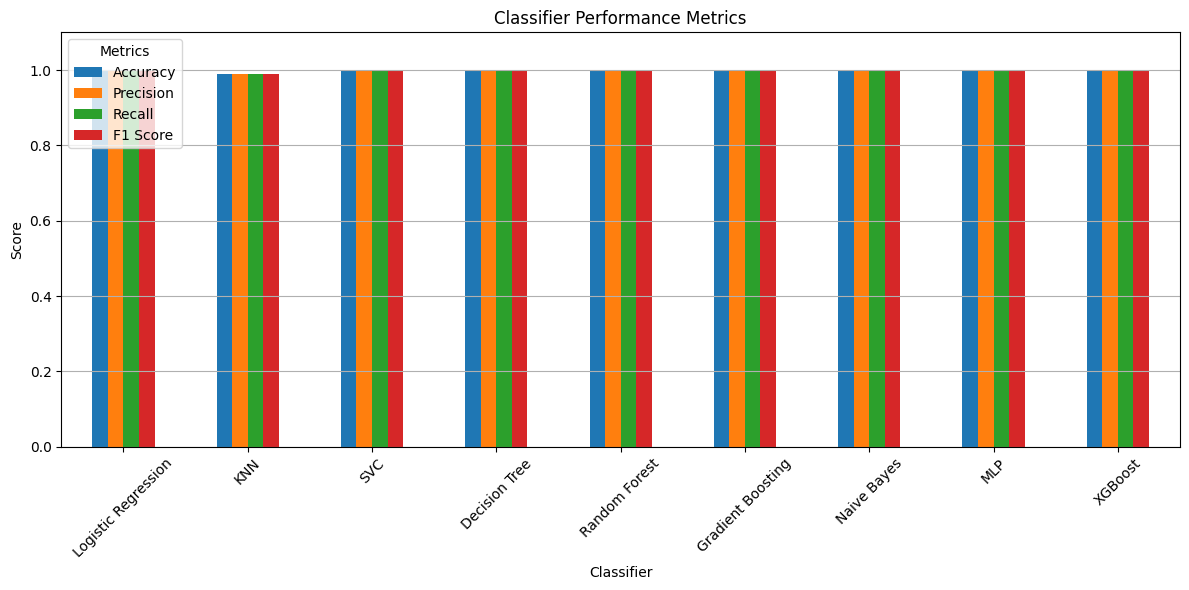

In [222]:

# Data for plotting
classifiers = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest',
               'Gradient Boosting', 'Naive Bayes', 'MLP', 'XGBoost']

# Metrics
accuracy = [1.00, 0.99, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00]
precision = [1.00, 0.99, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00]
recall = [1.00, 0.99, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00]
f1_score = [1.00, 0.99, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00]

# Create a DataFrame for better handling
import pandas as pd

metrics = pd.DataFrame({
    'Classifier': classifiers,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
})

# Set the index
metrics.set_index('Classifier', inplace=True)

# Plotting
metrics.plot(kind='bar', figsize=(12, 6))
plt.title('Classifier Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.legend(title='Metrics', loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [223]:
import pickle

# Assume clf is a trained classifier
with open('model.pkl', 'wb') as file:  # 'wb' stands for write binary
    pickle.dump(clf, file)
